In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

In [2]:
slumptest = pd.read_csv('C:/Users/kasoju/Desktop/KASOJU/PGDSBA/week4/Slump_Test.csv')
slumptest.head()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
strength = slumptest['Strength']
strength

0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.77
Name: Strength, Length: 103, dtype: float64

In [7]:
strength.mode()

0     26.42
1     28.29
2     29.77
3     30.43
4     30.97
5     32.71
6     33.51
7     33.78
8     34.99
9     35.52
10    36.19
11    37.39
12    38.46
13    41.01
14    41.14
15    41.27
16    41.81
17    42.08
18    44.08
19    52.65
dtype: float64

In [8]:
water_mean = slumptest['Water'].mean()
water_mean

197.16796116504858

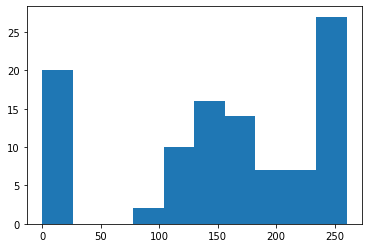

In [20]:
plt.hist(slumptest['Fly ash'])
plt.show()

In [21]:
slumptest['Fly ash'].mean()

149.0145631067961

In [22]:
slumptest['Fly ash'].median()

164.0

In [23]:
slumptest['Fly ash'].mode()

0    0.0
dtype: float64

In [24]:
slumptest.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse', 'Fine', 'SLUMP',
       'FLOW', 'Strength'],
      dtype='object')

In [26]:
cement_slag = slumptest[['Cement','Slag']]
cement_slag

,Cement,Slag
0,273.0,82.0
1,163.0,149.0
2,162.0,148.0
3,162.0,148.0
4,154.0,112.0
...,...,...
98,248.3,101.0
99,248.0,101.0
100,258.8,88.0
101,297.1,40.9


In [27]:
cement_slag.cov()

,Cement,Slag
Cement,6221.617417,-1161.508095
Slag,-1161.508095,3655.576463


In [28]:
slag_cement = slumptest[['Slag','Cement']]
slag_cement

,Slag,Cement
0,82.0,273.0
1,149.0,163.0
2,148.0,162.0
3,148.0,162.0
4,112.0,154.0
...,...,...
98,101.0,248.3
99,101.0,248.0
100,88.0,258.8
101,40.9,297.1


In [29]:
slag_cement.cov()

,Slag,Cement
Slag,3655.576463,-1161.508095
Cement,-1161.508095,6221.617417


In [30]:
corr_coef = slumptest[['Coarse','Cement']].corr()
corr_coef

,Coarse,Cement
Coarse,1.000000,-0.309857
Cement,-0.309857,1.000000


In [32]:
skewness = slumptest.skew()
skewness

Cement      0.145140
Slag       -0.193079
Fly ash    -0.680019
Water       0.263532
SP          1.125753
Coarse      0.121009
Fine        0.265958
SLUMP      -1.112837
FLOW       -0.520705
Strength    0.192235
dtype: float64

In [39]:
negative_skewness = skewness[abs(skewness)<-0].sum()
negative_skewness




0.0

In [41]:
missing_data = slumptest.isnull().sum()
missing_data

Cement      0
Slag        0
Fly ash     0
Water       0
SP          0
Coarse      0
Fine        0
SLUMP       0
FLOW        0
Strength    0
dtype: int64

In [48]:
flow = slumptest[['FLOW']]
flow

,FLOW
0,62.0
1,20.0
2,20.0
3,21.5
4,64.0
...,...
98,20.0
99,20.0
100,20.0
101,67.0


In [51]:
flow_duplicates = flow.duplicated()
sum(flow_duplicates)

52

In [56]:
slumptest.dtypes


Cement      float64
Slag        float64
Fly ash     float64
Water       float64
SP          float64
Coarse      float64
Fine        float64
SLUMP       float64
FLOW        float64
Strength    float64
dtype: object

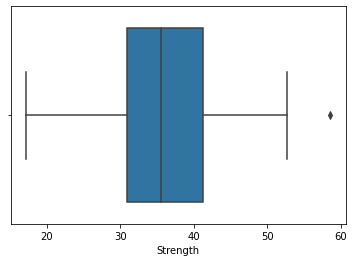

In [61]:
sns.boxplot(strength)

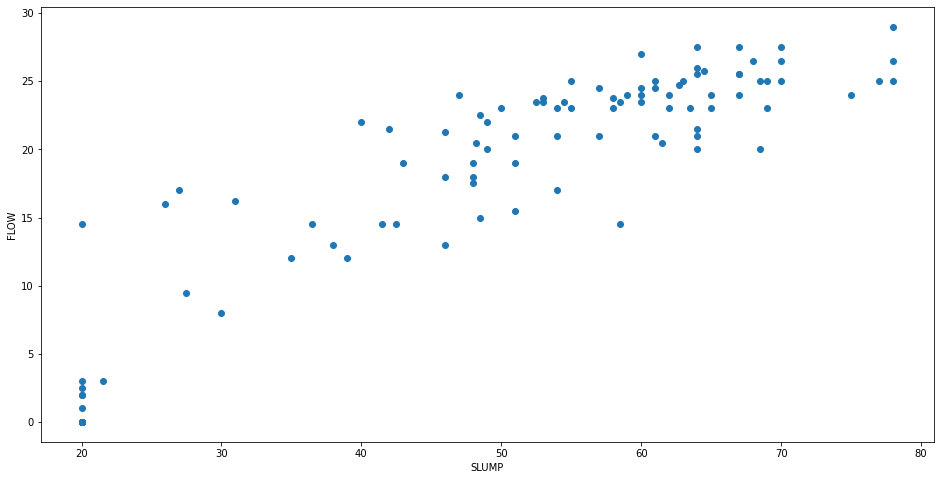

In [67]:


fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(slumptest['FLOW'], slumptest['SLUMP'])  # scatter plot
ax.set_xlabel('SLUMP')
ax.set_ylabel('FLOW')
plt.show()

In [68]:
from scipy import stats

zscore = np.abs(stats.zscore(slumptest))   # get the z-score of every value with respect to their columns
print(zscore)

[[0.54916499 0.06691714 0.51780366 ... 0.56859301 0.7086448  0.13453916]
 [0.85222678 1.18048168 0.49393227 ... 2.07257727 1.69367274 0.65391335]
 [0.8649667  1.16386132 0.49393227 ... 1.95774378 1.69367274 0.7398098 ]
 ...
 [0.36825805 0.16663934 1.06568072 ... 2.07257727 1.69367274 1.8538996 ]
 [0.85619718 0.61617991 1.06921003 ... 1.08534372 0.99463498 1.68338873]
 [1.51357732 1.29429085 0.87156859 ... 1.25759395 1.62381339 1.63210727]]


In [70]:
threshold = 1
np.where(zscore < threshold)

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
          1,   1,   1,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,
          3,   3,   4,   4,   4,   4,   4,   4,   4,   5,   5,   5,   5,
          5,   5,   5,   6,   6,   6,   6,   6,   7,   7,   7,   7,   7,
          8,   8,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,   9,
          9,   9,  10,  10,  10,  10,  10,  10,  11,  11,  11,  11,  11,
         11,  12,  12,  12,  12,  12,  12,  12,  13,  13,  13,  13,  13,
         13,  14,  14,  14,  14,  14,  14,  15,  15,  15,  15,  15,  15,
         15,  15,  16,  16,  16,  16,  16,  16,  16,  17,  17,  17,  17,
         17,  17,  17,  17,  18,  18,  18,  18,  18,  19,  19,  19,  19,
         19,  19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  20,  20,
         21,  21,  21,  21,  21,  22,  22,  22,  23,  23,  23,  23,  23,
         23,  24,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,  25,
         25,  25,  26,  26,  26,  26,  26,  26,  26

In [72]:
print(zscore[102][2])

0.87156858845969


In [73]:
fine = slumptest[['Fine']]
fine

,Fine
0,680.0
1,746.0
2,743.0
3,741.0
4,658.0
...,...
98,640.6
99,644.1
100,646.0
101,651.8


In [75]:
fineIQR = fine.quantile(0.75)-fine.quantile(0.25)
fineIQR

Fine    103.5
dtype: float64

In [76]:
slag = slumptest[['Slag']]
slag

,Slag
0,82.0
1,149.0
2,148.0
3,148.0
4,112.0
...,...
98,101.0
99,101.0
100,88.0
101,40.9


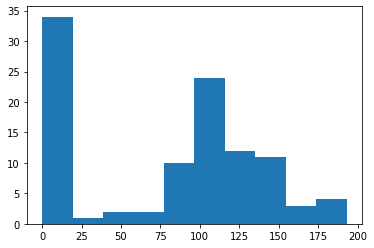

In [78]:
plt.hist(slumptest['Slag'])
plt.show()

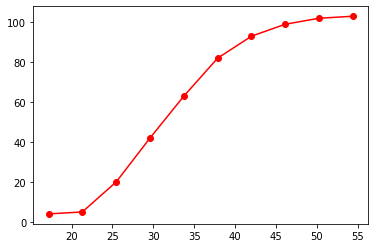

In [80]:
#obtain histogram values with 10 bins
values, base = np.histogram(strength, bins=10)

#find the cumulative sums
cumulative = np.cumsum(values)

# plot the ogive
plt.plot(base[:-1], cumulative, 'ro-')